# Mounting Google Drive


In [ ]:
from google.colab import drive
import sys

#Mount your Google drive to the VM
drive.mount('/content/gdrive')
sys.path.append("/content/drive/My Drive/Deep Learning FYP/Code")

#Follow link and give permission, copy code and paste in text box
#You only have to do this once per session

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Deep Learning FYP/Code

/content/gdrive/My Drive/Deep Learning FYP/Code


In [ ]:
pwd

'/content/gdrive/My Drive/Deep Learning FYP/Code'

# Used Librarires 

In [ ]:
 from PIL import Image 
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model

#___________
import matplotlib.image as mpimg
import glob
import cv2
import random
import pickle
 

#Function to Read Images

In [ ]:
def load_images_from_folder_test(root_folder,emo_folder):
  all_images = [] 
  all_labels = []
  # Get the classes index and name
  for cls, fol in enumerate(emo_folder): # Read classes of all folders
    print(cls,fol)
    #join the path of train and root folder 
    all_images_per_emo = os.listdir(os.path.join(root_folder, fol)) 
     # Read Images from all sub folder of train
    for im in all_images_per_emo:
      img = cv2.imread(os.path.join(root_folder, fol, im),cv2.IMREAD_GRAYSCALE)
      all_images.append(img)
      all_labels.append(cls)
 
  z = list(zip(all_images, all_labels)) # Zip the images with labels respectively
  random.shuffle(z) # Shuffling the images & labels
  
  all_images, all_labels = zip(*z)  # Unzipping the values after shuffling 
  #print(all_labels[:10])
  return (all_images,all_labels)

In [ ]:
#Directories 
root_folder_train = '/content/gdrive/My Drive/Deep Learning FYP/Code/train'
root_folder_test = '/content/gdrive/My Drive/Deep Learning FYP/Code/test/' 
emo_folder_train = os.listdir(root_folder_train) # emo_folder contains 7 folders of training images
emo_folder_test = os.listdir(root_folder_test)   # emo_folder contains 7 folders of testing images

#Loading Traing and Test images into memory

28709
28709
(48, 48)
(4, 5, 1, 6, 2, 6, 5, 4, 4, 5, 4, 5, 4, 0, 3, 4, 4, 3, 5, 1, 3, 2, 6, 2, 3, 5, 5, 4, 3, 2, 6, 2, 4, 2, 4, 0, 2, 5, 6, 5, 6, 0, 4, 2, 6, 2, 2, 3, 3, 4, 0, 2, 5, 3, 6, 4, 4, 0, 2, 2, 2, 6, 3, 5, 6, 0, 2, 3, 3, 3, 6, 4, 6, 3, 6, 2, 2, 2, 0, 2, 4, 3, 4, 5, 4, 6, 6, 4, 0, 4, 5, 2, 3, 0, 4, 6, 2, 3, 1, 2)


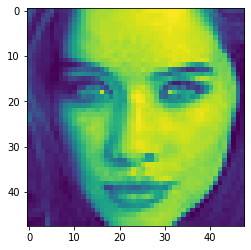

In [ ]:
train_images, train_labels = load_images_from_folder_test(root_folder_train,emo_folder_train)
test_images, test_labels = load_images_from_folder_test(root_folder_test,emo_folder_test)

# Saving the Dataset as pickle object 

In [ ]:
file = open('Dataset on local disk','wb')
obj_1 = ['train_images', train_images]
obj_2 = ['test_images', test_images]
obj_3 = ['train_labels', train_labels]
obj_4 = ['test_labels', test_labels]

 
pickle.dump(train_images,file)
pickle.dump(train_labels,file)
pickle.dump(test_images,file)
pickle.dump(test_labels,file)
file.close()


